In [1]:
import sys
import os
os.chdir('../')

import itertools as it
import numpy as np
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
%matplotlib inline

from tools.tools import save,load,lprint,load_config
from tools.bar import BAR

In [2]:
from fitlab.resman import RESMAN
from fitlab.parman import PARMAN

In [3]:
!ls inputs/boermulders-clas.py

inputs/boermulders-clas.py


In [5]:
conf=load_config('inputs/boermulders-clas.py')
conf['resman']=RESMAN(conf)
conf['resman'].get_residuals(conf['parman'].par);

loading sidis data sets 7003

In [13]:
datasets = {}

for index, data in conf['resman'].sidisres.tabs.iteritems():
    datasets[index] = pd.DataFrame(data) 

In [14]:
datasets.keys()

[7002, 7003]

In [17]:
def get_bins(data, axis):
    return np.unique(data[axis])

In [21]:
get_bins(datasets[7002], 'z_bin')

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
def plot_x_by_q2_by_z(data, pt_bin):
    
    x_bins = get_bins(data, 'x_bin')
    q2_bins = get_bins(data, 'q2_bin')
    z_bins = get_bins(data, 'z_bin')
    pt_bins = get_bins(data, 'pt_bin')
    
    colors = ['red', 'blue', 'purple', 'orange']
    hadron = np.unique(data.hadron)
    if hadron is 'pi+':
        hadron = '$#pi^{+}$'
    elif hadron is 'pi-':
        hadron = '$#pi^{-}$'
        
    plt.figure(figsize=(16, len(z_bins)*4))
    
    for index, z_bin in enumerate(z_bins):
        plt.subplot(len(z_bins), 4, index+1)

        for q2_bin in q2_bins:
            data_sub = data.query('z_bin == %d and pt_bin == %d  and q2_bin == %d' % (z_bin, pt_bin, q2_bin))
                
            if len(data_sub) > 0:
                plt.errorbar(x=data_sub.x, y=data_sub.value, yerr=data_sub.alpha, linestyle='', marker='o', color=colors[q2_bin])
                plt.plot(data_sub.x, data_sub.thy, linestyle='--', color=colors[q2_bin])
                plt.ylim([-0.2, 0.2])
                plt.axhline(0.0, linestyle='-', color='black', alpha=0.4)
    plt.tight_layout() 
    
def plot_x_by_q2_by_pt(data, z_bin):
    
    x_bins = get_bins(data, 'x_bin')
    q2_bins = get_bins(data, 'q2_bin')
    z_bins = get_bins(data, 'z_bin')
    pt_bins = get_bins(data, 'pt_bin')
    
    colors = ['red', 'blue', 'purple', 'orange']
    hadron = np.unique(data.hadron)
    if hadron is 'pi+':
        hadron = '$#pi^{+}$'
    elif hadron is 'pi-':
        hadron = '$#pi^{-}$'
        
    plt.figure(figsize=(16, len(pt_bins)*4))
    
    for index, pt_bin in enumerate(pt_bins):
        plt.subplot(len(pt_bins), 4, index+1)

        for q2_bin in q2_bins:
            data_sub = data.query('z_bin == %d and pt_bin == %d  and q2_bin == %d' % (z_bin, pt_bin, q2_bin))
                
            if len(data_sub) > 0:
                plt.errorbar(x=data_sub.x, y=data_sub.value, yerr=data_sub.alpha, linestyle='', marker='o', color=colors[q2_bin])
                plt.plot(data_sub.x, data_sub.thy, linestyle='--', color=colors[q2_bin])
                plt.ylim([-0.2, 0.2])
                plt.axhline(0.0, linestyle='-', color='black', alpha=0.4)
    plt.tight_layout() 
    
def plot_z_by_q2_by_pt(data, z_bin):
    
    x_bins = get_bins(data, 'x_bin')
    q2_bins = get_bins(data, 'q2_bin')
    z_bins = get_bins(data, 'z_bin')
    pt_bins = get_bins(data, 'pt_bin')
    
    colors = ['red', 'blue', 'purple', 'orange']
    hadron = np.unique(data.hadron)
    if hadron is 'pi+':
        hadron = '$#pi^{+}$'
    elif hadron is 'pi-':
        hadron = '$#pi^{-}$'
        
    plt.figure(figsize=(16, len(pt_bins)*4))
    
    for index, pt_bin in enumerate(pt_bins):
        plt.subplot(len(pt_bins), 4, index+1)

        for q2_bin in q2_bins:
            data_sub = data.query('z_bin == %d and pt_bin == %d  and q2_bin == %d' % (z_bin, pt_bin, q2_bin))
                
            if len(data_sub) > 0:
                plt.errorbar(x=data_sub.z, y=data_sub.value, yerr=data_sub.alpha, linestyle='', marker='o', color=colors[q2_bin])
                plt.plot(data_sub.z, data_sub.thy, linestyle='--', color=colors[q2_bin])
                plt.ylim([-0.2, 0.2])
                plt.axhline(0.0, linestyle='-', color='black', alpha=0.4)
    
    plt.tight_layout() 

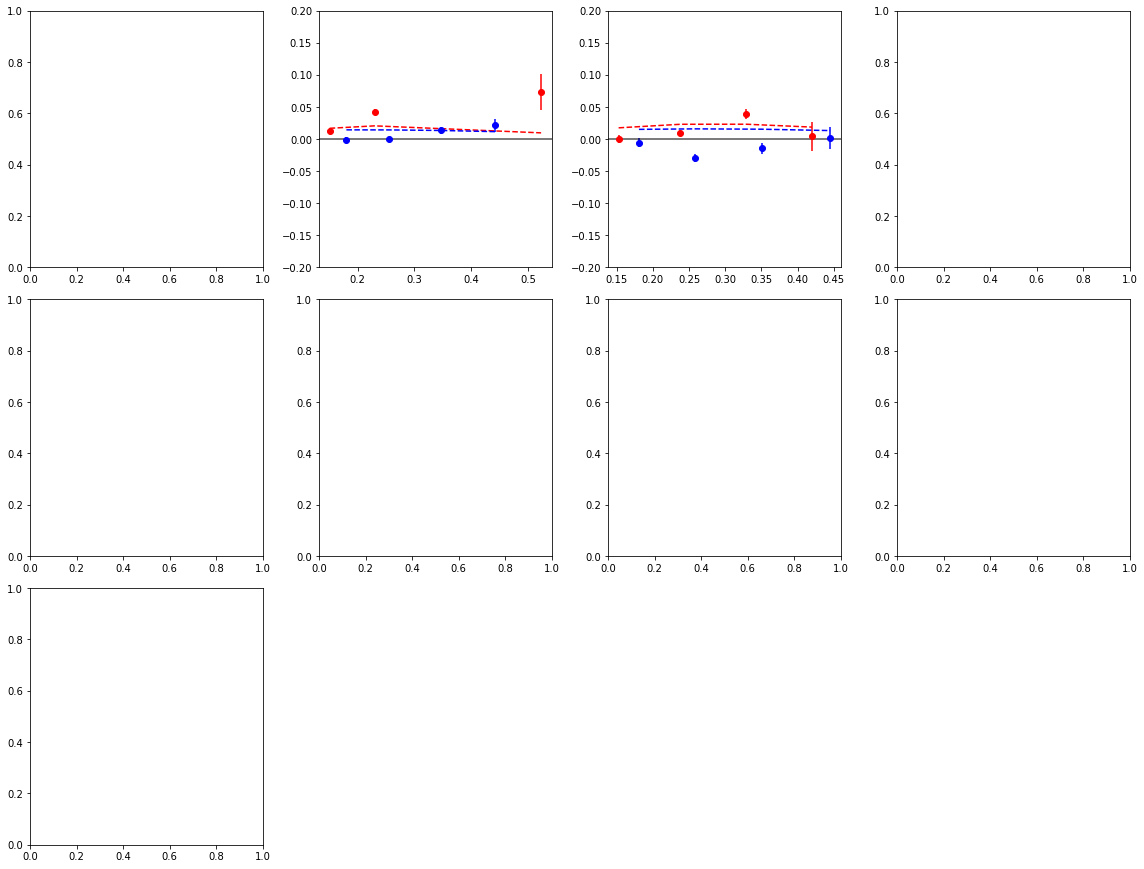

In [68]:
#for b in get_bins(datasets[7002], 'pt_bin'):
#    plot_x_by_q2_by_z(datasets[7002], b)
plot_x_by_q2_by_z(datasets[7002], 2)

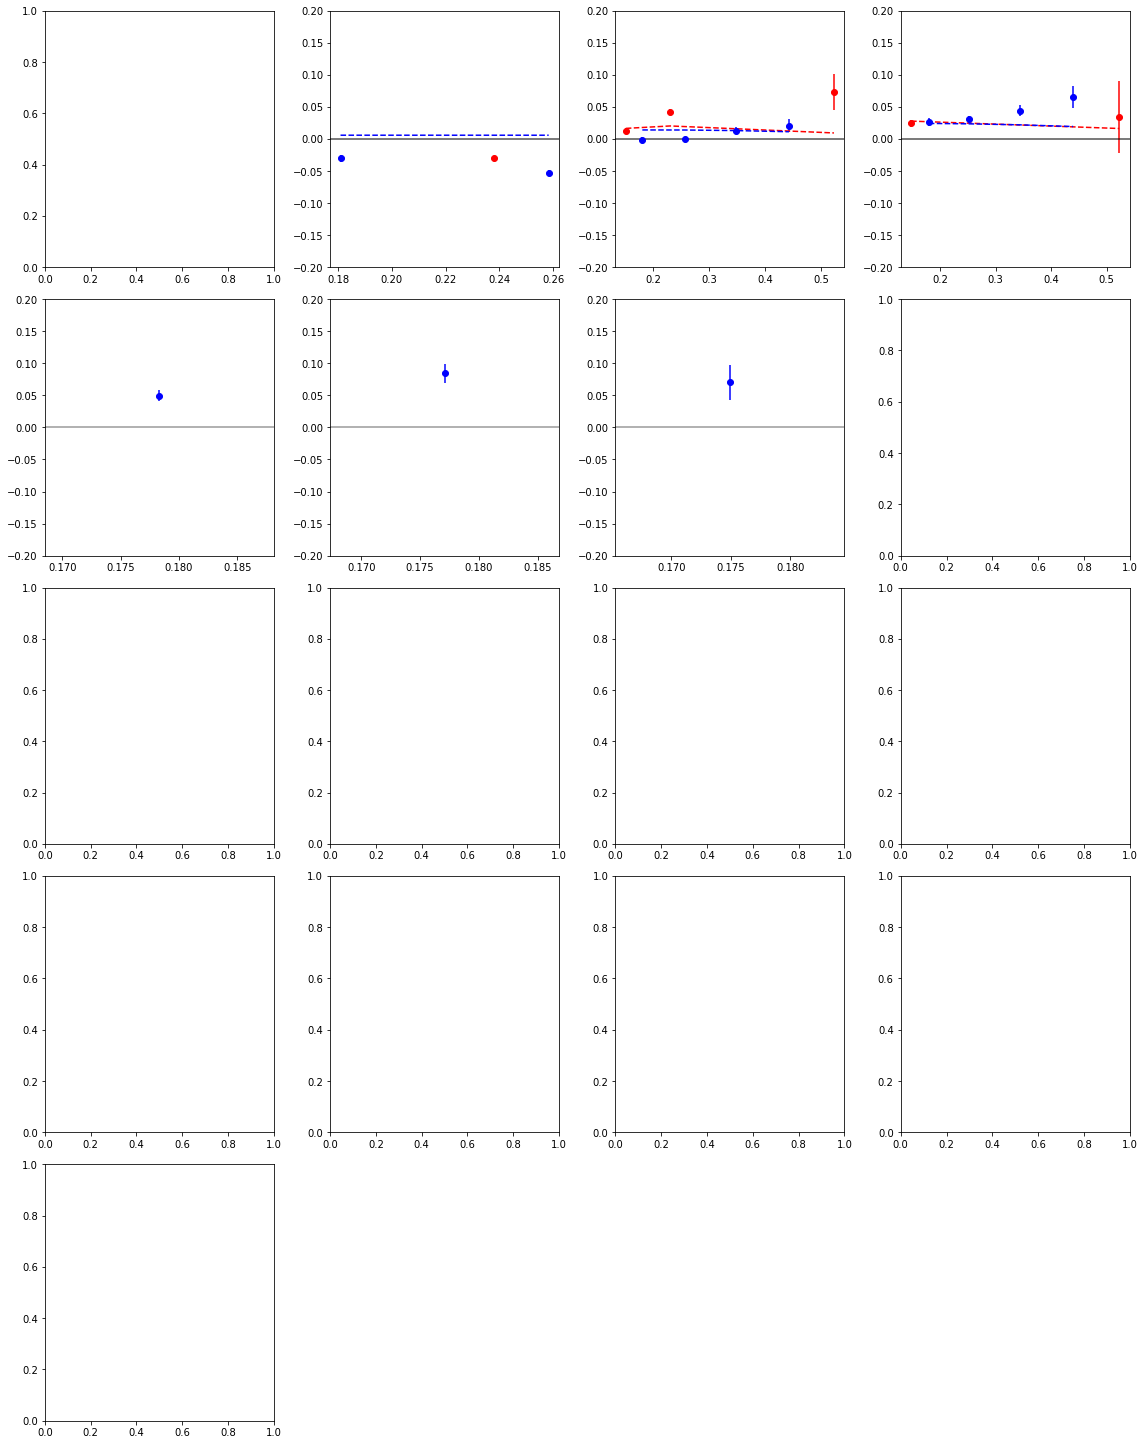

In [70]:
plot_x_by_q2_by_pt(datasets[7002], 2)

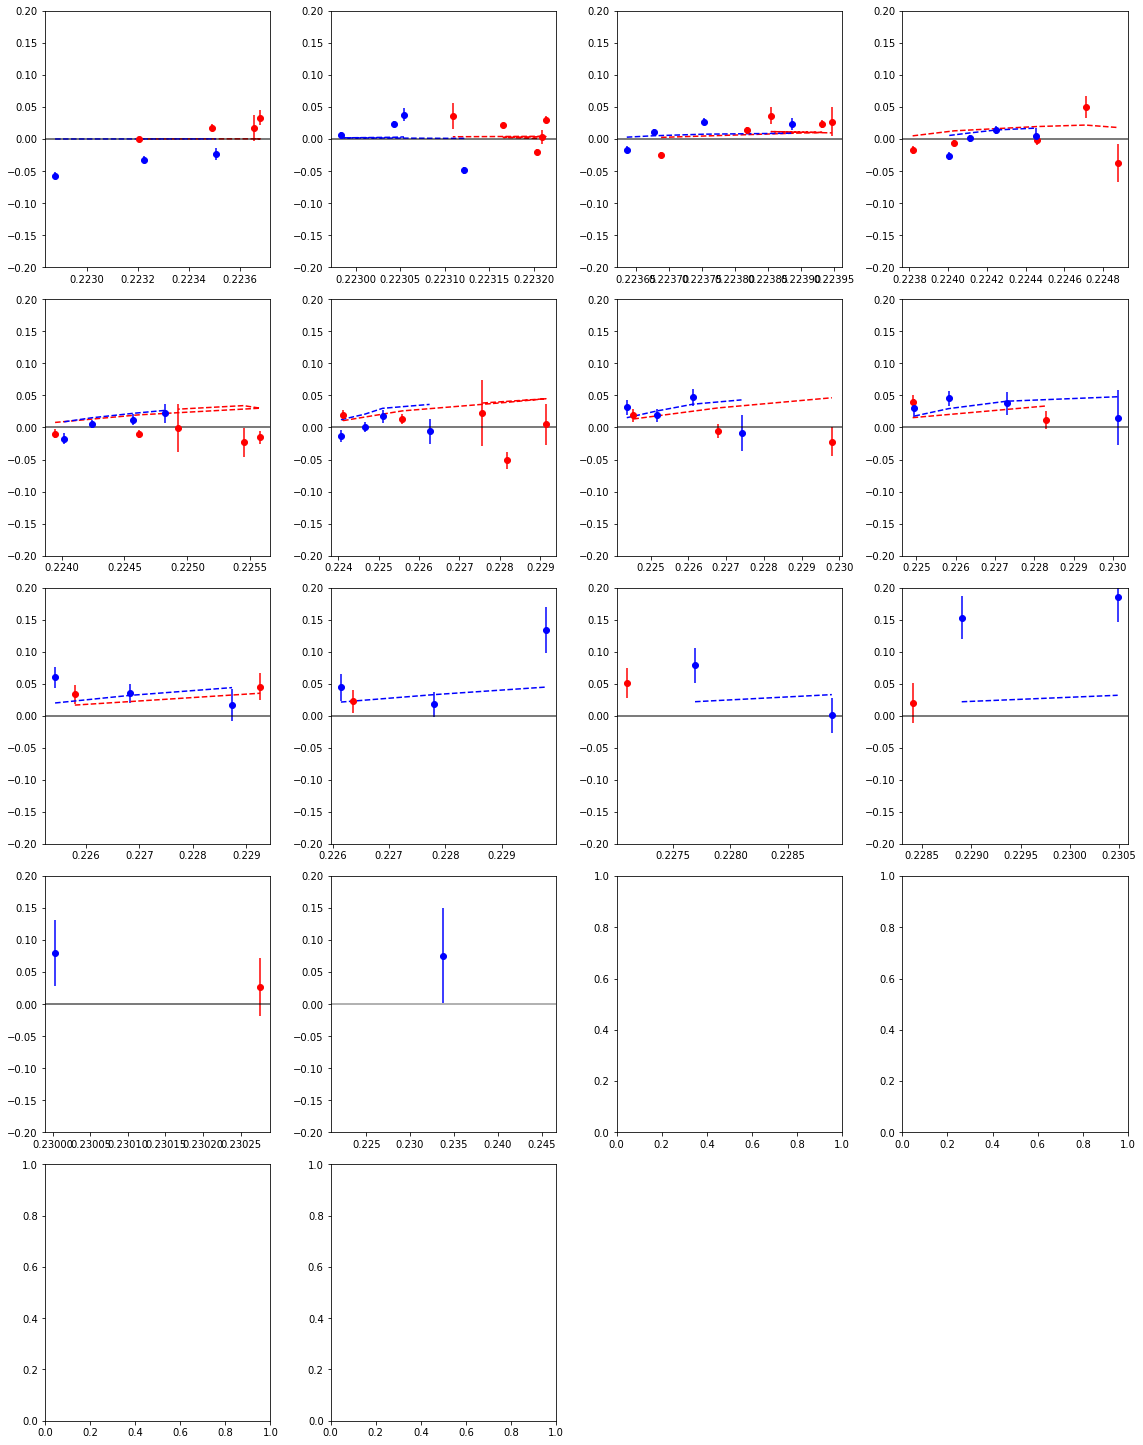

In [74]:
plot_z_by_q2_by_pt(datasets[7003], 4)